### The goal of this project is to predict the West Canada Select (WCS) Crude Oil prices with AI models based on Petroleum prices found at https://economicdashboard.alberta.ca/OilPrice

### Introduction:

AI model was developed to predict the WCS oil pirce based on WCS historical data. Crude prices are typically quoted at a particular location. WCS is one of North America's largest heavy crude oil stream. It is a heavy blended crude oil, composed mostly of bitumen blended with sweet synthetic and condensate diluents and 25 existing streams of both conventional and unconventional Alberta heavy crude oils at the large Husky Energy terminal in Hardisty, Alberta. Western Canadian Select — which is the benchmark for emerging heavy, high TAN (acidic) crudes - 9 is one of many petroleum products from the Western Canadian Sedimentary Basin oil sands. WCS was launched in December 2004 as a new heavy oil stream.

### Install and import python libraries

In [1]:
!pip install julian
import julian
import pandas as pd
import numpy as np
import scipy as sp
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.dates as mdates
from datetime import datetime
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 15),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

### Get crude oil price dataset

#### Import dataset from EIA and perform basic dataset cleaning

In [4]:
path = "F:\Oil & gas price\wcs oil price.csv"
wcs = pd.read_csv(path)
wcs

,Id,When,Type,Unit,Alberta,ModifiedDate
0,127458,4/1/1983 12:00:00 AM,WTI,$US/bbl,30.50,4/24/2020 9:14:20 AM
1,127459,5/1/1983 12:00:00 AM,WTI,$US/bbl,30.16,4/24/2020 9:14:20 AM
2,127460,6/1/1983 12:00:00 AM,WTI,$US/bbl,30.96,4/24/2020 9:14:20 AM
3,127461,7/1/1983 12:00:00 AM,WTI,$US/bbl,31.59,4/24/2020 9:14:20 AM
4,127462,8/1/1983 12:00:00 AM,WTI,$US/bbl,31.88,4/24/2020 9:14:20 AM
...,...,...,...,...,...,...
1008,128466,12/1/2019 12:00:00 AM,NatGas,$CDN/GJ,2.22,4/24/2020 9:14:21 AM
1009,128467,1/1/2020 12:00:00 AM,NatGas,$CDN/GJ,2.06,4/24/2020 9:14:21 AM
1010,128468,2/1/2020 12:00:00 AM,NatGas,$CDN/GJ,1.79,4/24/2020 9:14:21 AM
1011,128469,3/1/2020 12:00:00 AM,WTI,$US/bbl,29.21,4/24/2020 9:14:21 AM


In [10]:
wcs_op1 = wcs[~wcs['Type'].str.contains('WTI')]
wcs_op2 = wcs_op1[~wcs_op1['Type'].str.contains('NatGas')]
wcs_op2

,Id,When,Type,Unit,Alberta,ModifiedDate
443,127901,1/1/2005 12:00:00 AM,WCS,$US/bbl,29.42,4/24/2020 9:14:21 AM
444,127902,2/1/2005 12:00:00 AM,WCS,$US/bbl,28.44,4/24/2020 9:14:21 AM
445,127903,3/1/2005 12:00:00 AM,WCS,$US/bbl,36.50,4/24/2020 9:14:21 AM
446,127904,4/1/2005 12:00:00 AM,WCS,$US/bbl,31.02,4/24/2020 9:14:21 AM
447,127905,5/1/2005 12:00:00 AM,WCS,$US/bbl,27.46,4/24/2020 9:14:21 AM
...,...,...,...,...,...,...
621,128079,11/1/2019 12:00:00 AM,WCS,$US/bbl,42.32,4/24/2020 9:14:21 AM
622,128080,12/1/2019 12:00:00 AM,WCS,$US/bbl,39.11,4/24/2020 9:14:21 AM
623,128081,1/1/2020 12:00:00 AM,WCS,$US/bbl,36.82,4/24/2020 9:14:21 AM
624,128082,2/1/2020 12:00:00 AM,WCS,$US/bbl,27.28,4/24/2020 9:14:21 AM


In [21]:
wcs_op = wcs_op2.drop(['Id', 'Type', 'Unit', 'ModifiedDate'], axis = 1)
wcs_op

,When,Alberta
443,1/1/2005 12:00:00 AM,29.42
444,2/1/2005 12:00:00 AM,28.44
445,3/1/2005 12:00:00 AM,36.50
446,4/1/2005 12:00:00 AM,31.02
447,5/1/2005 12:00:00 AM,27.46
...,...,...
621,11/1/2019 12:00:00 AM,42.32
622,12/1/2019 12:00:00 AM,39.11
623,1/1/2020 12:00:00 AM,36.82
624,2/1/2020 12:00:00 AM,27.28


In [22]:
wcs_op_rename = wcs_op.rename(columns = {'When':'Date', 'Alberta':'WCS Oil Price ($US/bbl)'})
wcs_op_rename.head()

,Date,WCS Oil Price ($US/bbl)
443,1/1/2005 12:00:00 AM,29.42
444,2/1/2005 12:00:00 AM,28.44
445,3/1/2005 12:00:00 AM,36.50
446,4/1/2005 12:00:00 AM,31.02
447,5/1/2005 12:00:00 AM,27.46


#### First and last five rows of WTI spot price dataset

In [23]:
df_wcs = wcs_op_rename.reset_index(drop=True)
df_wcs['Date'] = pd.to_datetime(df_wcs['Date'], infer_datetime_format = True)
df_wcs.head()

,Date,WCS Oil Price ($US/bbl)
0,2005-01-01,29.42
1,2005-02-01,28.44
2,2005-03-01,36.50
3,2005-04-01,31.02
4,2005-05-01,27.46


In [24]:
df_wcs.tail()

,Date,WCS Oil Price ($US/bbl)
178,2019-11-01,42.32
179,2019-12-01,39.11
180,2020-01-01,36.82
181,2020-02-01,27.28
182,2020-03-01,12.84


#### WTI spot price dataset with date as index

In [25]:
oil_wcs = df_wcs.set_index(['Date'])
oil_wcs.head()

,WCS Oil Price ($US/bbl)
Date,
2005-01-01,29.42
2005-02-01,28.44
2005-03-01,36.50
2005-04-01,31.02
2005-05-01,27.46


In [26]:
oil_wcs.tail()

,WCS Oil Price ($US/bbl)
Date,
2019-11-01,42.32
2019-12-01,39.11
2020-01-01,36.82
2020-02-01,27.28
2020-03-01,12.84


In [27]:
print('Columns: Number of missing values')
print(oil_wcs.isnull().sum(axis=0))

Columns: Number of missing values
WCS Oil Price ($US/bbl)    0
dtype: int64


In [28]:
oil_wcs.dtypes

WCS Oil Price ($US/bbl)    float64
dtype: object

### Plot WTI historical spot price

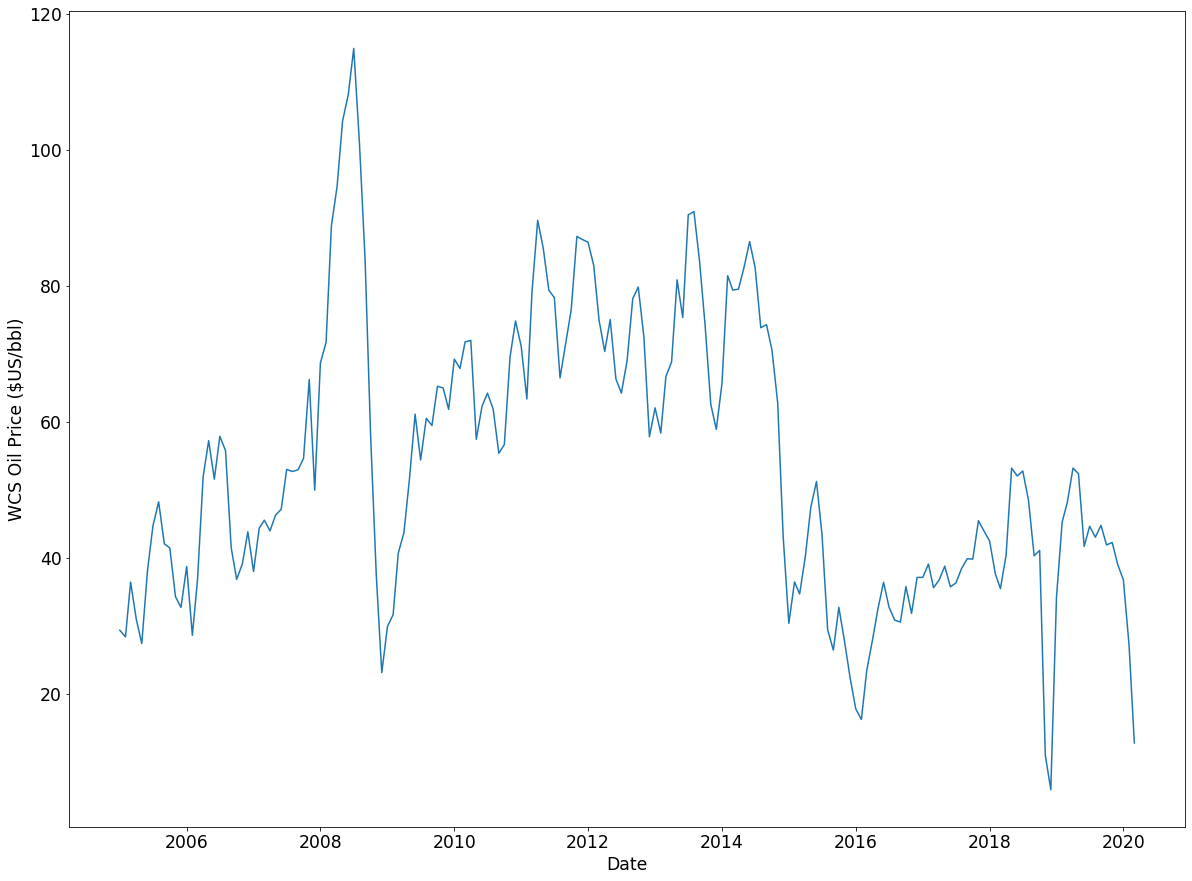

In [30]:
plt.xlabel('Date')
plt.ylabel('WCS Oil Price ($US/bbl)')
plt.plot(oil_wcs)

## WTI spot price forcasting

#### Convert date to julian date and show first and last five rows

In [31]:
oil_wcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2005-01-01 to 2020-03-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WCS Oil Price ($US/bbl)  183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [33]:
oil_wcs['Julian'] = oil_wcs.index.to_julian_date()
oil_wcs.head(5)

,WCS Oil Price ($US/bbl),Julian
Date,,
2005-01-01,29.42,2453371.5
2005-02-01,28.44,2453402.5
2005-03-01,36.50,2453430.5
2005-04-01,31.02,2453461.5
2005-05-01,27.46,2453491.5


In [34]:
oil_wcs.tail(5)

,WCS Oil Price ($US/bbl),Julian
Date,,
2019-11-01,42.32,2458788.5
2019-12-01,39.11,2458818.5
2020-01-01,36.82,2458849.5
2020-02-01,27.28,2458880.5
2020-03-01,12.84,2458909.5


#### Plot predicted price

C:\Users\cgsun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


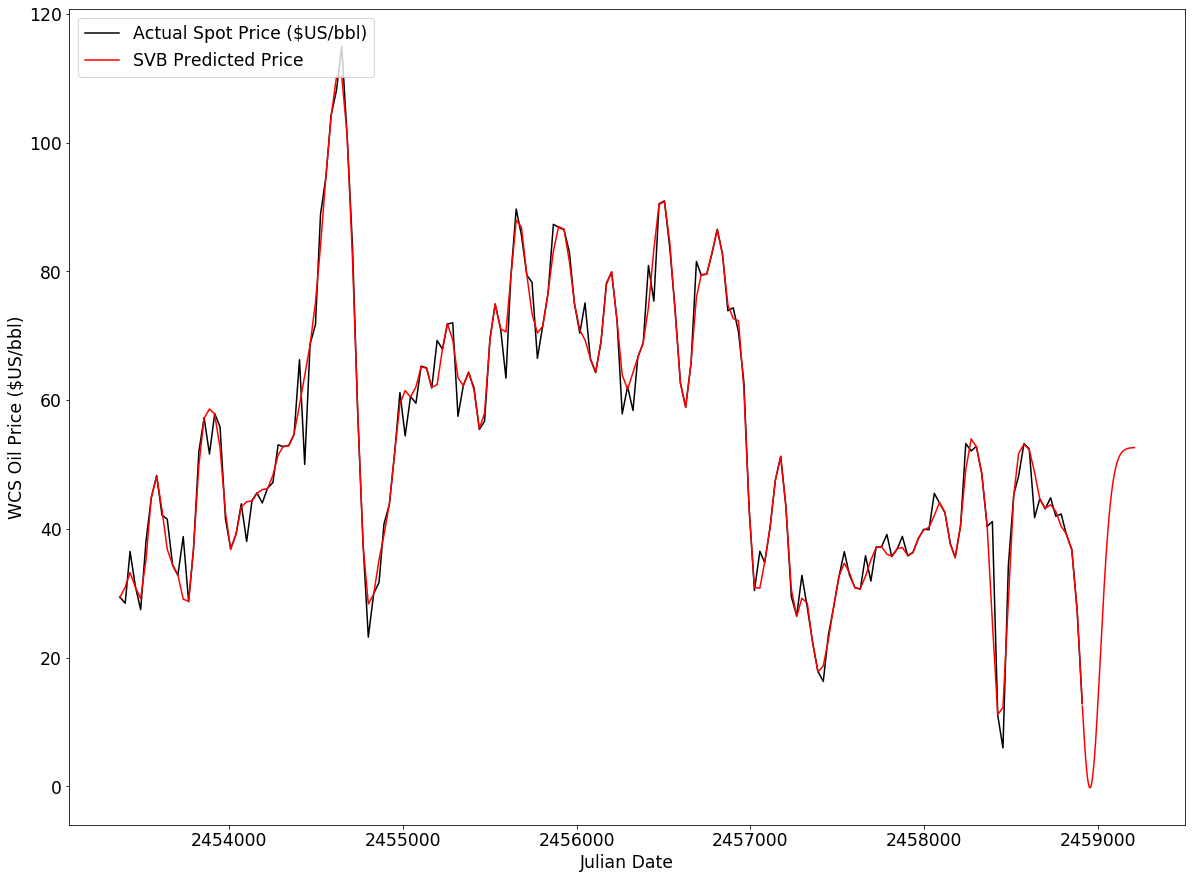

In [35]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

future_days = []
future_price = []


# Create model

days = oil_wcs["Julian"].to_frame()
price = oil_wcs["WCS Oil Price ($US/bbl)"].to_frame()

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(days, price)


# Extend a number of days for forecasting the future 
last_day = 2458909.5
for i in range(1, 301):
    future_days.append([last_day + i])
    future_price.append(np.nan)

    
# Convert back to float, so, divide every element by 100
svr_rbf_pred = list(map(lambda x: float(x), svr_rbf.predict(days)))
svr_rbf_pred_future = list(map(lambda x: float(x), svr_rbf.predict(future_days)))


# Plot data out
plt.plot(days, price, color='black', label='Actual Spot Price ($US/bbl)')
plt.plot(days, svr_rbf_pred, color='red', label='SVB Predicted Price')
plt.plot(future_days, svr_rbf_pred_future, color='red')
plt.xlabel('Julian Date')
plt.ylabel('WCS Oil Price ($US/bbl)')
plt.legend(loc=2)
plt.show()

#### Number of days for price forcasting

In [36]:
len(future_days)

300